In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import PIL.Image as Image
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [40]:
dataset_url = r"https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Panks/.keras/datasets/flower_photos')

In [41]:
path = r"C:\Users\Panks\.keras\datasets\flower_photos\flower_photos"
path

'C:\\Users\\Panks\\.keras\\datasets\\flower_photos\\flower_photos'

In [42]:
data_dir = pathlib.Path(path)
data_dir

WindowsPath('C:/Users/Panks/.keras/datasets/flower_photos/flower_photos')

In [43]:
for i in data_dir.iterdir():
    print(i)

C:\Users\Panks\.keras\datasets\flower_photos\flower_photos\daisy
C:\Users\Panks\.keras\datasets\flower_photos\flower_photos\dandelion
C:\Users\Panks\.keras\datasets\flower_photos\flower_photos\LICENSE.txt
C:\Users\Panks\.keras\datasets\flower_photos\flower_photos\roses
C:\Users\Panks\.keras\datasets\flower_photos\flower_photos\sunflowers
C:\Users\Panks\.keras\datasets\flower_photos\flower_photos\tulips


In [44]:
flower_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*")),
}

In [45]:
flowers_label = {
    "roses" : 0,
    "daisy" : 1,
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4
}
          

In [46]:
flower_dict["sunflowers"][0]

WindowsPath('C:/Users/Panks/.keras/datasets/flower_photos/flower_photos/sunflowers/1008566138_6927679c8a.jpg')

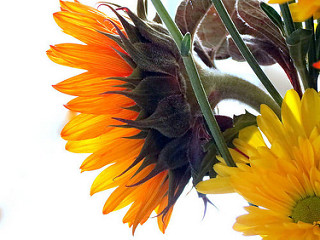

In [47]:
Image.open(flower_dict["sunflowers"][100])

In [48]:
no_of_classes = len(flower_dict)
print("Number of classes: ", no_of_classes)

Number of classes:  5


In [50]:
x,y = [], []
for key, value in flower_dict.items():
    for item in value:
        img = cv2.imread(str(item))
        reduced_img = cv2.resize(img, (224, 224))
        x.append(reduced_img)
        y.append(flowers_label[key])

In [51]:
x= np.array(x)
y= np.array(y)
x.shape, y.shape

((3670, 224, 224, 3), (3670,))

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [53]:
#normalize data
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

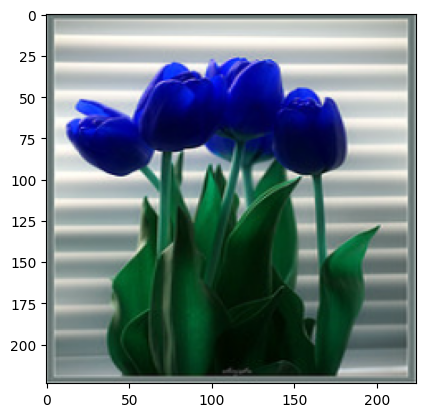

In [54]:
plt.imshow(x_train_scaled[166])
plt.show()

In [56]:
#CNN architecture
#covolutional layer -> max pooling -> convolutional layer -> max pooling -> convolutional layer -> flatten -> dense layer -> dense layer -> output layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(no_of_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\Panks\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 346112)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    44,302,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,357 (169.36 MB)

 Trainable params: 44,396,357 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
history = model.fit(
    x_train_scaled,
    y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test_scaled, y_test),
    validation_split=0.1
)

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8765 - loss: 0.3637 - val_accuracy: 0.5913 - val_loss: 1.2925
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9434 - loss: 0.1929 - val_accuracy: 0.5777 - val_loss: 1.6518
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9812 - loss: 0.0791 - val_accuracy: 0.5681 - val_loss: 2.0796
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9932 - loss: 0.0325 - val_accuracy: 0.5599 - val_loss: 2.6827
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9968 - loss: 0.0181 - val_accuracy: 0.5695 - val_loss: 2.7762


In [61]:
#callbacks are fuctions that are called at certain points during training
#early stopping is a callback that stops training when a monitored metric has stopped improving
from tensorflow.keras.callbacks import EarlyStopping
EarlyStopping = EarlyStopping(monitor='val_loss',
                              patience=5, #patience is the number of epochs with no improvement after which training will be stopped
                              #no improvement then too training is done until patience is reached = 2: ie. 2 epochs still be trained
                              restore_best_weights=True, #restore the weights of the best model
                              )

In [62]:
model.fit(    x_train_scaled,
            y_train,
            epochs=5,
            callbacks=[EarlyStopping]
        )

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.9786 - loss: 0.0674
Epoch 2/5


C:\Users\Panks\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9405 - loss: 0.1994
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.9823 - loss: 0.0600
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9786 - loss: 0.0999
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9937 - loss: 0.0224


In [63]:
#test data prediction
test_loss, test_acc = model.evaluate(x_test_scaled, y_test, verbose=2)
print('Test accuracy:', test_acc)

23/23 - 5s - 197ms/step - accuracy: 0.5572 - loss: 3.1076
Test accuracy: 0.5572206974029541


In [ ]:
#cifar-10 dataset -- car, airplane, bird, cat, deer, dog, frog, horse, ship, truck
#cifar-10 dataset is a dataset of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
#There are 50,000 training images and 10,000 test images. 

In [ ]:
#deep cnn architecture